## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import csv # read and write csv files
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#Load the data 
df = pd.read_csv('ab_data.csv')

#display top rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# Number of rown in the dataset 
#df.shape
len(df)

294478

In [5]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

c. The number of unique users in the dataset.

In [6]:
# Display number of unique users 
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [7]:
proportion_of_users = df['converted'].mean() * 100
print(proportion_of_users,'%')

11.96591935560551 %


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# extracting records where treatment and control do not match old and new page 
treat_old = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
cont_new = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# Add record lenght 
donot_match = len(treat_old) + len(cont_new)

frames = [treat_old, cont_new]

# Combine dataframes
donot_match_data_frame = pd.concat(frames)

donot_match

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Copy dataframe
df2 = df

# Remove mismatch records 
records = donot_match_data_frame.index
df2 = df2.drop(records)

In [11]:
# Verify all rows were removed 
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# length of unique users 
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# the duplicated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
# Finding the repeated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Drop the repeated user_id
df2 = df2.drop_duplicates(subset = 'user_id')

In [16]:
# Verifying the results 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# Probability of user converting
prob_converted = df2.converted.mean()
print (prob_converted)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Probability of control group converted
prob_conrol_converted = df2[df2['group'] == 'control']['converted'].mean()
print (prob_conrol_converted)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Probability of treatment group converted
prob_treat_converted = df2[df2['group'] == 'treatment']['converted'].mean()
print (prob_treat_converted)

0.11880806551510564


In [ ]:
prob_treat_converted - prob_conrol_converted

d. What is the probability that an individual received the new page?

In [20]:
# Probability of individual received new page  
prob_new_page = df2['landing_page'].value_counts()[0]/len(df2)
print (prob_new_page)

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**According to the results from the analysis above, the control group have a higher conversion rate than the treatment group. The difference between the proportions is minimal non-significant. The probability that an individual received the new page is around half of the results.
.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **Null Hupothesis
<br>
$H_0:  p_{new} - p_{old} \leq 0$
The difference between the sample population conversion rate of users given the new page and the old page will be equal to zero.**

<br>
- **Alternative hypotheses
<br>
$H_1: p_{new} - p_{old} > 0$
The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero.**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2.query('converted == 1').user_id.count()/df2.user_id.count()
print('Conversion of new Page is: ', p_new)

Conversion of new Page is:  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# The convert rate is the same for p old under the null
p_old = df2.query('converted == 1').user_id.count()/df2.user_id.count()
print('Conversion of old Page is: ', p_old)

Conversion of old Page is:  0.11959708724499628


**The convert rate is the same for $p_{old}$ under the null**

c. What is $n_{new}$?

In [23]:
# Calculate n_new
n_new = df2.query('landing_page == "new_page"')['user_id'].count()
print(n_new)

145310


d. What is $n_{old}$?

In [24]:
# Calculate n_old
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Simulate n_new transacrions with a convert rates under null hypothesis
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])
new_page_converted.mean()
print(new_page_converted)

[0 1 0 ... 0 0 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# Simulate n_old transacrions with a convert rates under null hypothesis
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])
old_page_converted.mean()
print(old_page_converted)

[0 0 0 ... 0 0 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# The difference between new and old page converted 
new_p_mean = new_page_converted.mean()
old_p_mean = old_page_converted.mean()
print(new_p_mean)
print(old_p_mean)
print(new_p_mean - old_p_mean)

0.11849150092904824
0.12088880322700551
-0.002397302297957274


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[1-p_old, p_old])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

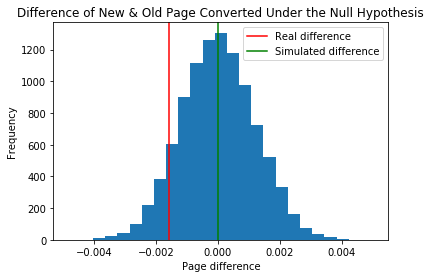

In [29]:
# Plot histogram
obs_diffs = np.array(prob_treat_converted - prob_conrol_converted).mean()

plt.hist(p_diffs, bins=25)
plt.title('Difference of New & Old Page Converted Under the Null Hypothesis')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(obs_diffs), color='r', label= "Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
(p_diffs > obs_diffs).mean()

0.9077

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


**Here we want to look at if p_value suggests to reject the null hypotheis. It looks like over 90% of the population sample lies above the observed difference and the histogram tells us that the new page is as bad as the old page and we fail to reject the null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
# Import statsmodels
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

print("convert_rate_old:", convert_old, 
      "\nconvert_rate_new:", convert_new,
      "\n# of rows (n_old):", n_old,
      "\n# of rows (n_new):", n_new)


/Users/ismail/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_rate_old: 17489 
convert_rate_new: 17264 
# of rows (n_old): 145274 
# of rows (n_new): 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print("z-score:", z_score,
     "\np-value:", p_value)

z-score: -1.3109241984234394 
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score tells me that, if the treatment had no effect, there would be less than a 5% chance of obtaining the scores I did obtain. Our results above (-1.310. and 0.90) rate. Here we cannot reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Sice we have two different outcomes (converted and not-converted), I will can use the logistic regression model.** 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df3 = df2

In [34]:
df3['intercept'] = pd.Series(np.zeros(len(df3)), index=df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0.0,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0.0,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0,0.0


In [35]:
index_to_change = df3[df3['group'] == 'treatment'].index

# Change values
df3.set_value(index = index_to_change, col='ab_page', value = 1)
df3.set_value(index = df3.index, col ='intercept', value=1)

# we change the datatype 
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

/Users/ismail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/ismail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [50]:
# Check everything  has worked
df3[df3['group']=='treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [67]:
import statsmodels.discrete.discrete_model as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [68]:
# logistic regression
logit = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# results
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [69]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2018-07-07 16:36 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer: The p-value is 0.19 (P>|z|) which is lower than the p-value calculated if part II above using the z-test. The p-value is not small enought to reject null hypothesis. The low p-value in part III indicates that the predictors are very significant to the changes, therfore we cannot reject the null hypothesis**

**The p-value in Part III is different from Part II because we used two different approachs of the calculation. The p-value in the Part II suggest how likely the null hypothesis is true. The p-value in the Part II is highr and tells us that we fail to reject the null.**



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer: If we add additional terms, it must have large impact on the outcome. Time spent on the site might be better measure for high conversion.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [70]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
countries_df.head()
df_new.groupby('country')['country'].count()

country
CA     14499
UK     72466
US    203619
Name: country, dtype: int64

In [71]:
### Creating dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop(['CA'], axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [72]:


logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        16:36:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

from the results below table, It seems that difference between US & UK is very minimum and satistically insignificant

In [73]:
### Fit Your Linear Model And Obtain the Results
fit_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.0687
Date:               2018-07-07 16:36 BIC:              212790.6484
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           0                LL-Null:          -1.0639e+05
Df Residuals:       290583           LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0057  -349.1822  0.0000  -2.0075  -1.9850
==================================================================

"""

<a id='conclusions'></a>
## Conclusions

After looking at the difference between the new and old page conversion rates, we cannot reject the null hypothesis. From the histogram shown in this report. The new page conversion performance did not result for better performance as expected. Both UK & USA the outcome is near the same. I will recommend to for the company to go back and assess what went wrong and document lessons learned to improve new A/B testing and to improve their new page. 

